<a href="https://colab.research.google.com/github/Jyts2094/Final-Project/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import nltk
import re

In [3]:
import pandas as pd
# load the dataset

dataset_path = '/content/drive/MyDrive/vaccination_all_tweets.csv'
dataset = pd.read_csv(dataset_path)
dataset.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [4]:
# print the dataset shape
dataset.shape

(228207, 16)

In [5]:
import pandas as pd

# Assuming you have already loaded your dataset
dataset_path = '/content/drive/MyDrive/vaccination_all_tweets.csv'
dataset = pd.read_csv(dataset_path)

# Define the sample size
sample_size = 100000

# Sample the dataset to reduce its size
dataset = dataset.sample(n=sample_size, random_state=0)

#  check the first few rows of the sampled dataset
dataset.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
112307,1408473814959153154,Hindustan Times,India,One of India's largest media companies. Latest...,2009-04-29 10:11:34,8087995,139,2928,True,2021-06-25 17:15:00,The #DeltaPlus variant of #Coronavirus has rai...,"['DeltaPlus', 'Coronavirus']",Twitter Media Studio,13,28,False
34439,1373296843489165320,Adam John Ritchie,"Oxford, UK",@UniofOxford COVID and rabies vaccine developm...,2011-10-03 11:11:48,2599,742,377,False,2021-03-20 15:34:16,@fascinatorfun I'd say exported vials is a ver...,NaN,Twitter Web App,1,12,False
41727,1377040882944376834,Dr. Sumana Chattopadhyay 🌊 #BLM,"Wisconsin, USA","An academic with a zest for politics, current ...",2011-02-28 06:04:28,484,1749,16167,False,2021-03-30 23:31:45,Second Moderna shot in the arm🙂! #Vaccinated #...,"['Vaccinated', 'Moderna', 'COVID19Vaccine', 'M...",Twitter Web App,0,2,False
37934,1375163920374235147,Former President-Elect: The Leviathan 🐍🗽,Portugal,"#Hacker, #Engineer, #Scientist and #Fisher.\n#...",2011-10-19 10:56:56,1301,3942,118527,False,2021-03-25 19:13:22,Good work PLA Airforce!\nAt least they're gett...,['SinoVac'],Twitter Web App,0,0,False
56853,1382733098794770433,The Age,"Melbourne, Australia",Breaking news. Must-read columnists. Award-win...,2009-04-16 23:28:23,906099,1193,482,True,2021-04-15 16:30:35,Getting the Dolly Parton Moderna jab marked th...,NaN,Echobox,2,2,False


In [7]:
# create new dataframe with columns needed for analysis
extracted_data= pd.DataFrame()
extracted_data['text']= dataset['text']
extracted_data['hashtag']=dataset['hashtags']
extracted_data.shape

(100000, 2)

In [8]:
# find null values
extracted_data.isnull().sum()

,0
text,0
hashtag,21986


In [10]:
# remove data items with null values
extracted_data = extracted_data.dropna(subset=['text', 'hashtag'])
extracted_data.shape

(78014, 2)

In [11]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')

def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

# Function to clean text
def clean_text(text):
    # Remove emojis
    text = remove_emoji(text)

    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'www\S+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]

    # Join tokens back into a single string
    cleaned_text = ' '.join(tokens)
    return cleaned_text

# Apply cleaning function to text column
extracted_data['cleaned_text'] = extracted_data['text'].apply(clean_text)


extracted_data.head(5)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,text,hashtag,cleaned_text
112307,The #DeltaPlus variant of #Coronavirus has rai...,"['DeltaPlus', 'Coronavirus']",DeltaPlus variant Coronavirus raised concerns ...
41727,Second Moderna shot in the arm🙂! #Vaccinated #...,"['Vaccinated', 'Moderna', 'COVID19Vaccine', 'M...",Second Moderna shot arm Vaccinated Moderna COV...
37934,Good work PLA Airforce!\nAt least they're gett...,['SinoVac'],Good work PLA Airforce least theyre getting re...
124000,"[16:49:26] 122002, 01-07-2021, 22 dose2 at Meg...","['COVAXIN', 'GurgaonCOVAXIN']",164926 122002 01072021 22 dose2 Meghraj Apollo...
134913,"[08:49:44] 122018, 22-07-2021, 71 dose1 at Par...","['COVAXIN', 'GurgaonCOVAXIN']",084944 122018 22072021 71 dose1 Park Hospital ...


In [12]:
# Sentiment analysis

nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
# Initialize the VADER sentiment analyzer
sid = SIA()

# Apply sentiment analysis to the 'cleaned_text' column
# The lambda function processes each text entry by:
# 1. Converting text to lowercase
# 2. Removing non-word characters
# 3. Calculating sentiment scores using VADER
extracted_data['sentiments'] = extracted_data['cleaned_text'].apply(lambda x: sid.polarity_scores(' '.join(re.findall(r'\w+', str(x).lower()))))

# Extract the positive sentiment score and add a small value to avoid zeroes
extracted_data['Positive Sentiment'] = extracted_data['sentiments'].apply(lambda x: x['pos'] + 1 * (10**-6))

# Extract the neutral sentiment score and add a small value to avoid zeroes
extracted_data['Neutral Sentiment'] = extracted_data['sentiments'].apply(lambda x: x['neu'] + 1 * (10**-6))

# Extract the negative sentiment score and add a small value to avoid zeroes
extracted_data['Negative Sentiment'] = extracted_data['sentiments'].apply(lambda x: x['neg'] + 1 * (10**-6))

# Combine the sentiment scores into a single sentiment value
# The sentiment score is calculated by subtracting the negative sentiment from the positive sentiment
extracted_data['Sentiment Score'] = extracted_data.apply(lambda row: row['Positive Sentiment'] - row['Negative Sentiment'], axis=1)

# Display the first few rows of the resulting DataFrame
extracted_data.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,text,hashtag,cleaned_text,sentiments,Positive Sentiment,Neutral Sentiment,Negative Sentiment,Sentiment Score
112307,The #DeltaPlus variant of #Coronavirus has rai...,"['DeltaPlus', 'Coronavirus']",DeltaPlus variant Coronavirus raised concerns ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000001,1.000001,0.000001,0.000
41727,Second Moderna shot in the arm🙂! #Vaccinated #...,"['Vaccinated', 'Moderna', 'COVID19Vaccine', 'M...",Second Moderna shot arm Vaccinated Moderna COV...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000001,1.000001,0.000001,0.000
37934,Good work PLA Airforce!\nAt least they're gett...,['SinoVac'],Good work PLA Airforce least theyre getting re...,"{'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'comp...",0.209001,0.791001,0.000001,0.209
124000,"[16:49:26] 122002, 01-07-2021, 22 dose2 at Meg...","['COVAXIN', 'GurgaonCOVAXIN']",164926 122002 01072021 22 dose2 Meghraj Apollo...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000001,1.000001,0.000001,0.000
134913,"[08:49:44] 122018, 22-07-2021, 71 dose1 at Par...","['COVAXIN', 'GurgaonCOVAXIN']",084944 122018 22072021 71 dose1 Park Hospital ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000001,1.000001,0.000001,0.000


In [13]:
from keras import layers
from keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(extracted_data['cleaned_text'])
sequences = tokenizer.texts_to_sequences(extracted_data['cleaned_text'])
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...   43  493  239]
 [   0    0    0 ...    2   82  519]
 [   0    0    0 ...  973   15   17]
 ...
 [   0    0    0 ... 3275    3 1078]
 [   0    0    0 ... 3173  234  546]
 [   0    0    0 ...   32    1   12]]


In [14]:
import numpy as np
import tensorflow as tf
labels = np.array(extracted_data['Sentiment Score'])
y = []
for i in range(len(labels)):
    if labels[i] == 0:
        y.append(0)
    if labels[i] <0:
        y.append(1)
    if labels[i] >0:
        y.append(2)
y = np.array(y)
labels = tf.keras.utils.to_categorical(y, 3)
del y
print(labels)

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [15]:
# creating reference tags for 5 vaccines -> Pfizer, Covaxin(Bharat Biotech), Sputnik,AstraZenca(Covishield),Moderna
pfizer_refs = ["Pfizer","pfizer","Pfizer–BioNTech","pfizer-bioNtech","BioNTech","biontech"]
bbiotech_refs = ["covax","covaxin","Covax","Covaxin","Bharat Biotech","bharat biotech","BharatBiotech","bharatbiotech"]
sputnik_refs = ["russia","sputnik","Sputnik","V"]
astra_refs = ['sii','SII','adar poonawalla','Covishield','covishield','astra','zenca','Oxford–AstraZeneca','astrazenca','oxford-astrazenca','serum institiute']
moderna_refs = ['moderna','Moderna','mRNA-1273','Spikevax']

In [16]:
def refer(tweet, refs):
  flag =0
  for ref in refs:
    if tweet.find(ref) != -1:
      flag =1
  return flag

extracted_data['pfizer'] = extracted_data['cleaned_text'].apply(lambda x : refer(x, pfizer_refs))
extracted_data['bbiotech'] = extracted_data['cleaned_text'].apply(lambda x : refer(x, bbiotech_refs))
extracted_data['sputnik'] = extracted_data['cleaned_text'].apply(lambda x : refer(x, sputnik_refs))
extracted_data['astra'] = extracted_data['cleaned_text'].apply(lambda x : refer(x, astra_refs))
extracted_data['moderna'] = extracted_data['cleaned_text'].apply(lambda x : refer(x, moderna_refs))


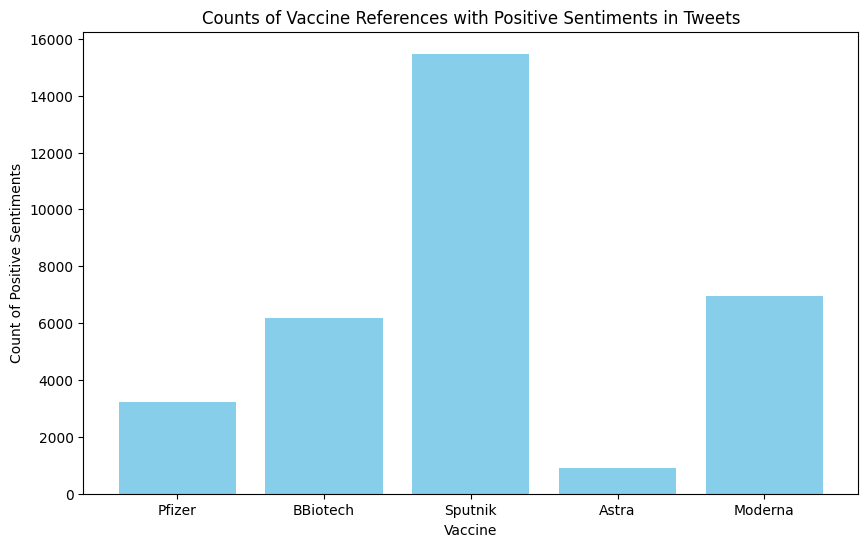

In [17]:
import matplotlib.pyplot as plt

# Filter the data to include only positive sentiment
positive_data = extracted_data[extracted_data['Sentiment Score'] > 0]

# Define the vaccine labels and count the number of positive references for each vaccine
counts = {
    'Pfizer': positive_data['pfizer'].value_counts().get(1, 0),
    'BBiotech': positive_data['bbiotech'].value_counts().get(1, 0),
    'Sputnik': positive_data['sputnik'].value_counts().get(1, 0),
    'Astra': positive_data['astra'].value_counts().get(1, 0),
    'Moderna': positive_data['moderna'].value_counts().get(1, 0)
}

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(counts.keys(), counts.values(), color='skyblue')

# Add labels and title
plt.xlabel('Vaccine')
plt.ylabel('Count of Positive Sentiments')
plt.title('Counts of Vaccine References with Positive Sentiments in Tweets')

# Show the plot
plt.show()


In [18]:
extracted_data1 = pd.DataFrame(extracted_data['hashtag'])


flattened_hashtags = [hashtag for sublist in extracted_data1['hashtag'] for hashtag in sublist]

# Get unique values
unique_hashtags = list(set(flattened_hashtags))

# Print the unique hashtags
print("Unique hashtags:", unique_hashtags)

Unique hashtags: ['国', '稚', 'ก', 'ھ', 'ч', 'ल', 'β', 'ء', 'ந', '트', '幼', 'h', '재', '랑', '6', 'ы', 'п', 'उ', 'ய', '𝐩', '哈', '\\', 'ट', '文', '키', 'ம', '[', 'す', 'ै', 'ら', 'ú', 'ୋ', 'м', 'ş', '米', 'ᴋ', 'أ', '7', 'д', 'l', '派', 'ไ', 'ق', 'ศ', 'な', 'Í', 'С', '興', '相', 'r', 'ர', 'A', '엑', '생', '武', 'خ', 'व', 'ę', 'ワ', 'ீ', '集', 'p', 'T', 'ธ', '募', 'ப', 'т', 'த', '額', 'ɪ', '尔', '근', 'ہ', 'è', '子', 'ଦ', 'ो', 'i', '惑', 'ᴛ', '강', 'R', 'k', '사', 'भ', '̇', 'ス', '𝙨', 'ถ', '保', 'ช', '일', '보', '๊', 'ю', 'š', 'ि', 'г', 'ك', 'ี', '业', 'ษ', 'य', 'ظ', '学', 'ś', 'ல', 'ு', 'ص', 'ل', '𝐫', '莫', '𝗲', '8', '査', '𝐕', 'ı', 'ே', 'Z', '0', 'प', '要', 'ᴘ', '回', 'L', 'ى', 'イ', 'ι', 'ё', 'ः', '라', 'ン', 'ฤ', 'ت', 'Β', '𝙃', 'न', '歸', ',', 'ح', 'ॐ', 'إ', 'a', 'د', 'ூ', 'ล', 'و', 'จ', '𝐟', 'Q', 'द', '接', 'ழ', 'с', 'K', '𝙞', 'ک', 'ʟ', 'Я', '9', '科', '축', ' ', 'ெ', '彩', '5', 'स', 'ᴠ', '्', 'ع', 'ے', 'ć', 'α', 'В', 'G', '데', '𝗰', 'S', '어', 'ر', '２', '지', 'μ', 'ண', 'I', '𝗻', 'ํ', 'ି', 'โ', '𝐢', 'ใ', 'レ', '็', 'گ', 'ク', 'ி', '

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.25, random_state=0)
print(len(X_train), len(X_test), len(y_train), len(y_test))
print("Number of test samples:", len(X_test))

58510 19504 58510 19504
Number of test samples: 19504
